In [3]:
import selanneal
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import time
import importlib

plt.rcParams.update({'font.size': 16})


def project_to_dim(hist, dim=2):
    for i in np.arange(len(hist.shape), dim, -1):
        hist = hist.sum(axis=i - 1)
    return hist


# set seed for reproducible results
np.random.seed(4)

## specify number of bins and dimensions

In [4]:
bins = (100, 100)

n_bins = 1
for bin in bins:
    n_bins *= bin

n_dim = len(bins)
n_sig = 10 * n_bins
n_bkg = 100 * n_bins
print('number of signal events:', n_sig)
print('number of background events:', n_bkg)
print('number of bins:', n_bins)

number of signal events: 100000
number of background events: 1000000
number of bins: 10000


## generate data points

In [5]:
coord = scipy.stats.multivariate_normal(np.zeros(n_dim), np.identity(n_dim)).rvs(n_sig)
h_signal, edges = np.histogramdd(coord, bins=bins)


In [6]:
# random correlations
ev = np.random.randint(4, int(10 * n_dim / (n_dim - 1)), size=n_dim - 1)
ev = np.concatenate((ev, [n_dim * 10 - ev.sum()])) / 10
cov = scipy.stats.random_correlation.rvs(ev)
mean = np.random.randint(0, 20, size=n_dim)

# generate data points
coord = scipy.stats.multivariate_normal(mean, cov).rvs(n_sig)
h_signal, edges = np.histogramdd(coord, bins=bins)

# generate background histogram
h_background = scipy.stats.poisson(50).rvs(n_bins).reshape(bins)


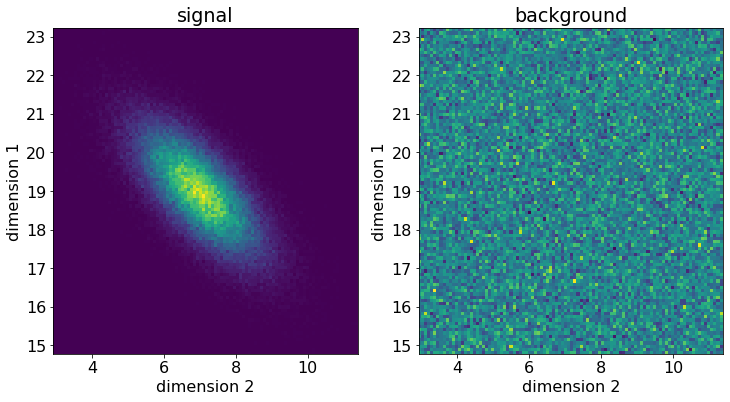

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pcolor(edges[1], edges[0], project_to_dim(h_signal))
axs[0].set_title('signal')

axs[1].pcolormesh(edges[1], edges[0], project_to_dim(h_background))
axs[1].set_title('background')

for ax in axs:
    ax.set_ylabel('dimension 1')
    ax.set_xlabel('dimension 2')

plt.show()

## run the simulated annealing

In [8]:
# importlib.reload(selanneal.annealing)

start = time.time()
best_state, best_energy = selanneal.run(h_signal, h_background, mode='edges')
print(f'time: {time.time() - start:.2f} seconds')


inital temperature: 10
final temperature: 0.001
steps: 1000
inital energy: -129.11031211553262

 progress     temperature     energy     acceptance     improvement
--------------------------------------------------------------------
  0.02           8.318       -136.0        0.95           0.6
  0.04           6.918       -144.8        1.0            0.7
  0.06           5.754       -150.1        0.9            0.65
  0.08           4.786       -149.6        0.8            0.4
  0.1            3.981       -150.9        0.95           0.5
  0.12           3.311       -152.1        0.85           0.45
  0.14           2.754       -147.9        0.9            0.3
  0.16           2.291       -147.2        0.85           0.4
  0.18           1.905       -148.6        0.75           0.4
  0.2            1.585       -149.3        0.75           0.45
  0.22           1.318       -150.5        0.7            0.35
  0.24           1.096       -163.3        0.85           0.7
  0.26           0.

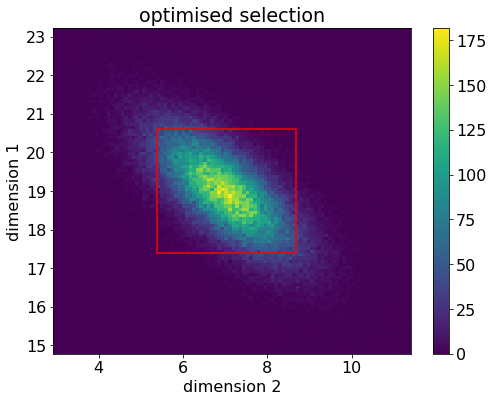

In [9]:
plt.figure(figsize=(8, 6))

v1_lower_cut, v1_upper_cut = best_state[0]
v2_lower_cut, v2_upper_cut = best_state[1]

plt.pcolor(edges[1], edges[0], project_to_dim(h_signal))
for cut in best_state[0]:
    plt.hlines(edges[0][cut], edges[1][v2_lower_cut], edges[1][v2_upper_cut], color='red')
for cut in best_state[1]:
    plt.vlines(edges[1][cut], edges[0][v1_lower_cut], edges[0][v1_upper_cut], color='red')
plt.title('optimised selection')
plt.ylabel('dimension 1')
plt.xlabel('dimension 2')
plt.colorbar()
plt.show()
